In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#@title Figure settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [45]:
import datetime
# import nitime
# import nitime.analysis as nta
# import nitime.timeseries as ts
# import nitime.utils as tsu
# from nitime.viz import drawmatrix_channels
# import multiprocessing as mp
from seaborn import heatmap
import datetime
import seaborn as sns
import pandas as pd
import networkx as nx

In [186]:
import time
import collections
import math

In [190]:
tasks = ['motor', 'social', 'wm', 'gambling', 'relational', 'emotion', 'language', 'rest']
p_tasks = np.array([1554, 4516, 2076, 2675, 3954, 2605, 1928, 1333])/180/359
p_tasks 

array([0.02404828, 0.06988548, 0.03212628, 0.04139585, 0.06118849,
       0.0403126 , 0.02983596, 0.02062829])

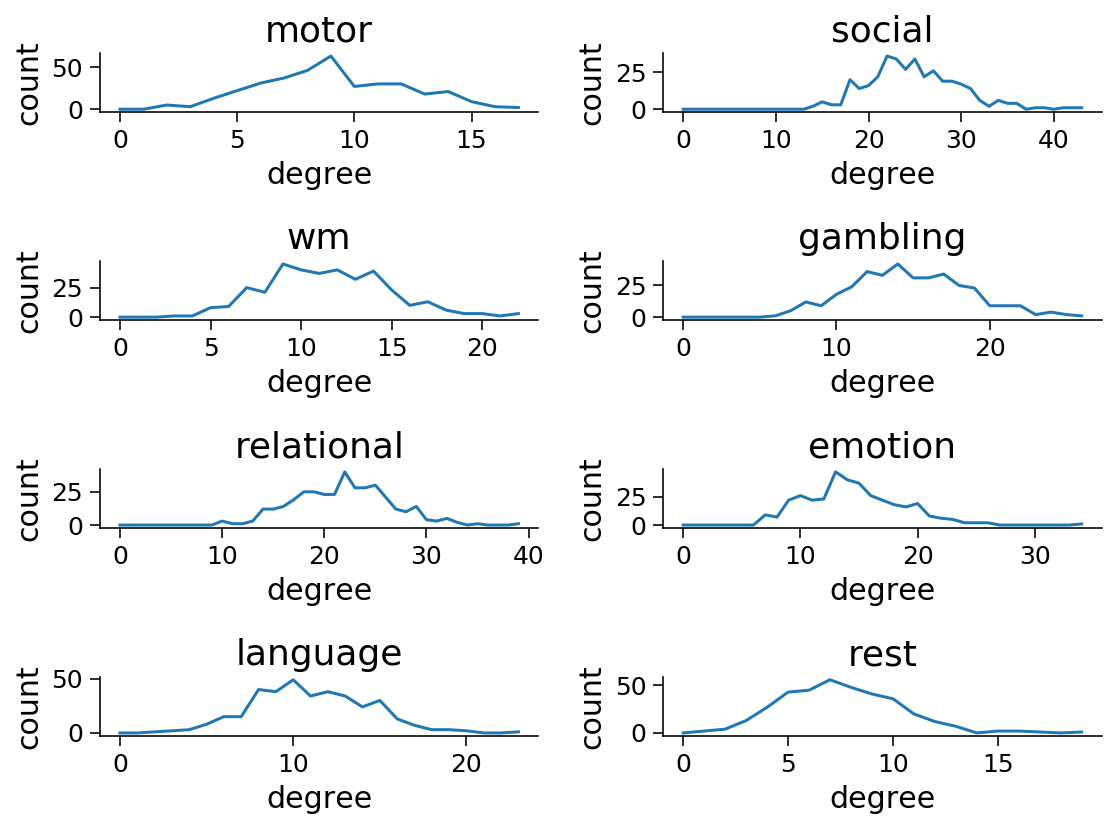

In [199]:
g_list = []
for i in range(len(p_tasks)):
    g_list.append(nx.fast_gnp_random_graph(360,p_tasks[i]))
          
plt.figure(969)
for i in range(len(p_tasks)):
    plt.subplot(4,2,i+1)
    plt.plot(nx.degree_histogram(g_list[i]))
    plt.title(f'{tasks[i]}')
    plt.ylabel('count')
    plt.xlabel('degree')

Text(0.5, 0, 'task')

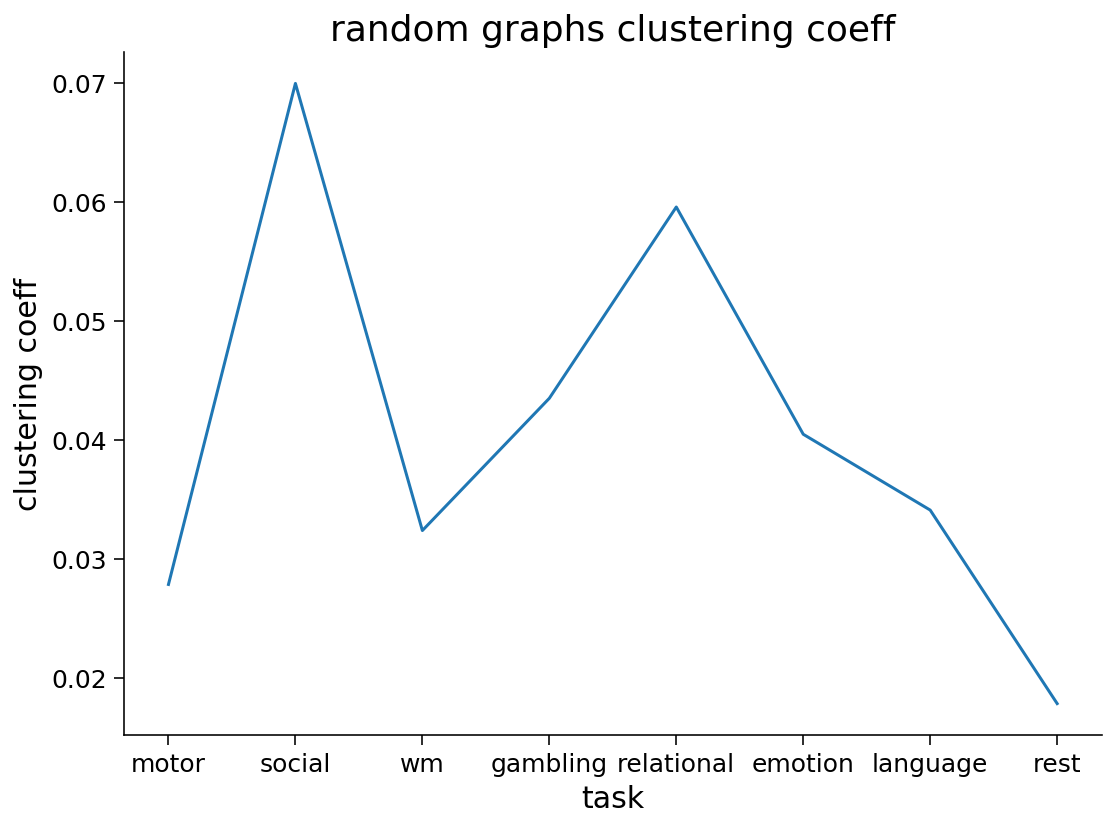

In [203]:
plt.figure(969)
clust = np.zeros((len(tasks),1))
for i in range(len(p_tasks)):
#     plt.subplot(4,2,i+1)
#     plt.plot(nx.degree_histogram(g_list[i]))
    clust[i] = nx.average_clustering(g_list[i])
plt.plot(tasks, clust)
plt.title('random graphs clustering coeff')
plt.ylabel('clustering coeff')
plt.xlabel('task')

In [8]:
regions = np.load("regions.npy").T
region_info = dict(
    name=regions[0].tolist(),
    network=regions[1],
    myelin=regions[2].astype(np.float),
)

In [9]:
def load_one(filename, average=True):
    file = np.load(f'{filename}.npy')
#     remove nans
    file [np.isnan(file)]=0
    if average:
        file = np.mean(file, axis=0)
    return file

def draw_half_heatmap(data, size):
    df = pd.DataFrame(data, columns=regions[0], index=regions[0])
    mask = np.zeros_like(df.T)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=size)
        ax = sns.heatmap(df.T, mask=mask, vmax=.3, square=True)

In [176]:
mat = load_one('wm/g1_av')

mat = mat > 0.08
G = nx.from_numpy_matrix(mat)
print(nx.density(G), '\n', nx.average_clustering(G))


0.03212627669452182 
 0.3111476389279765


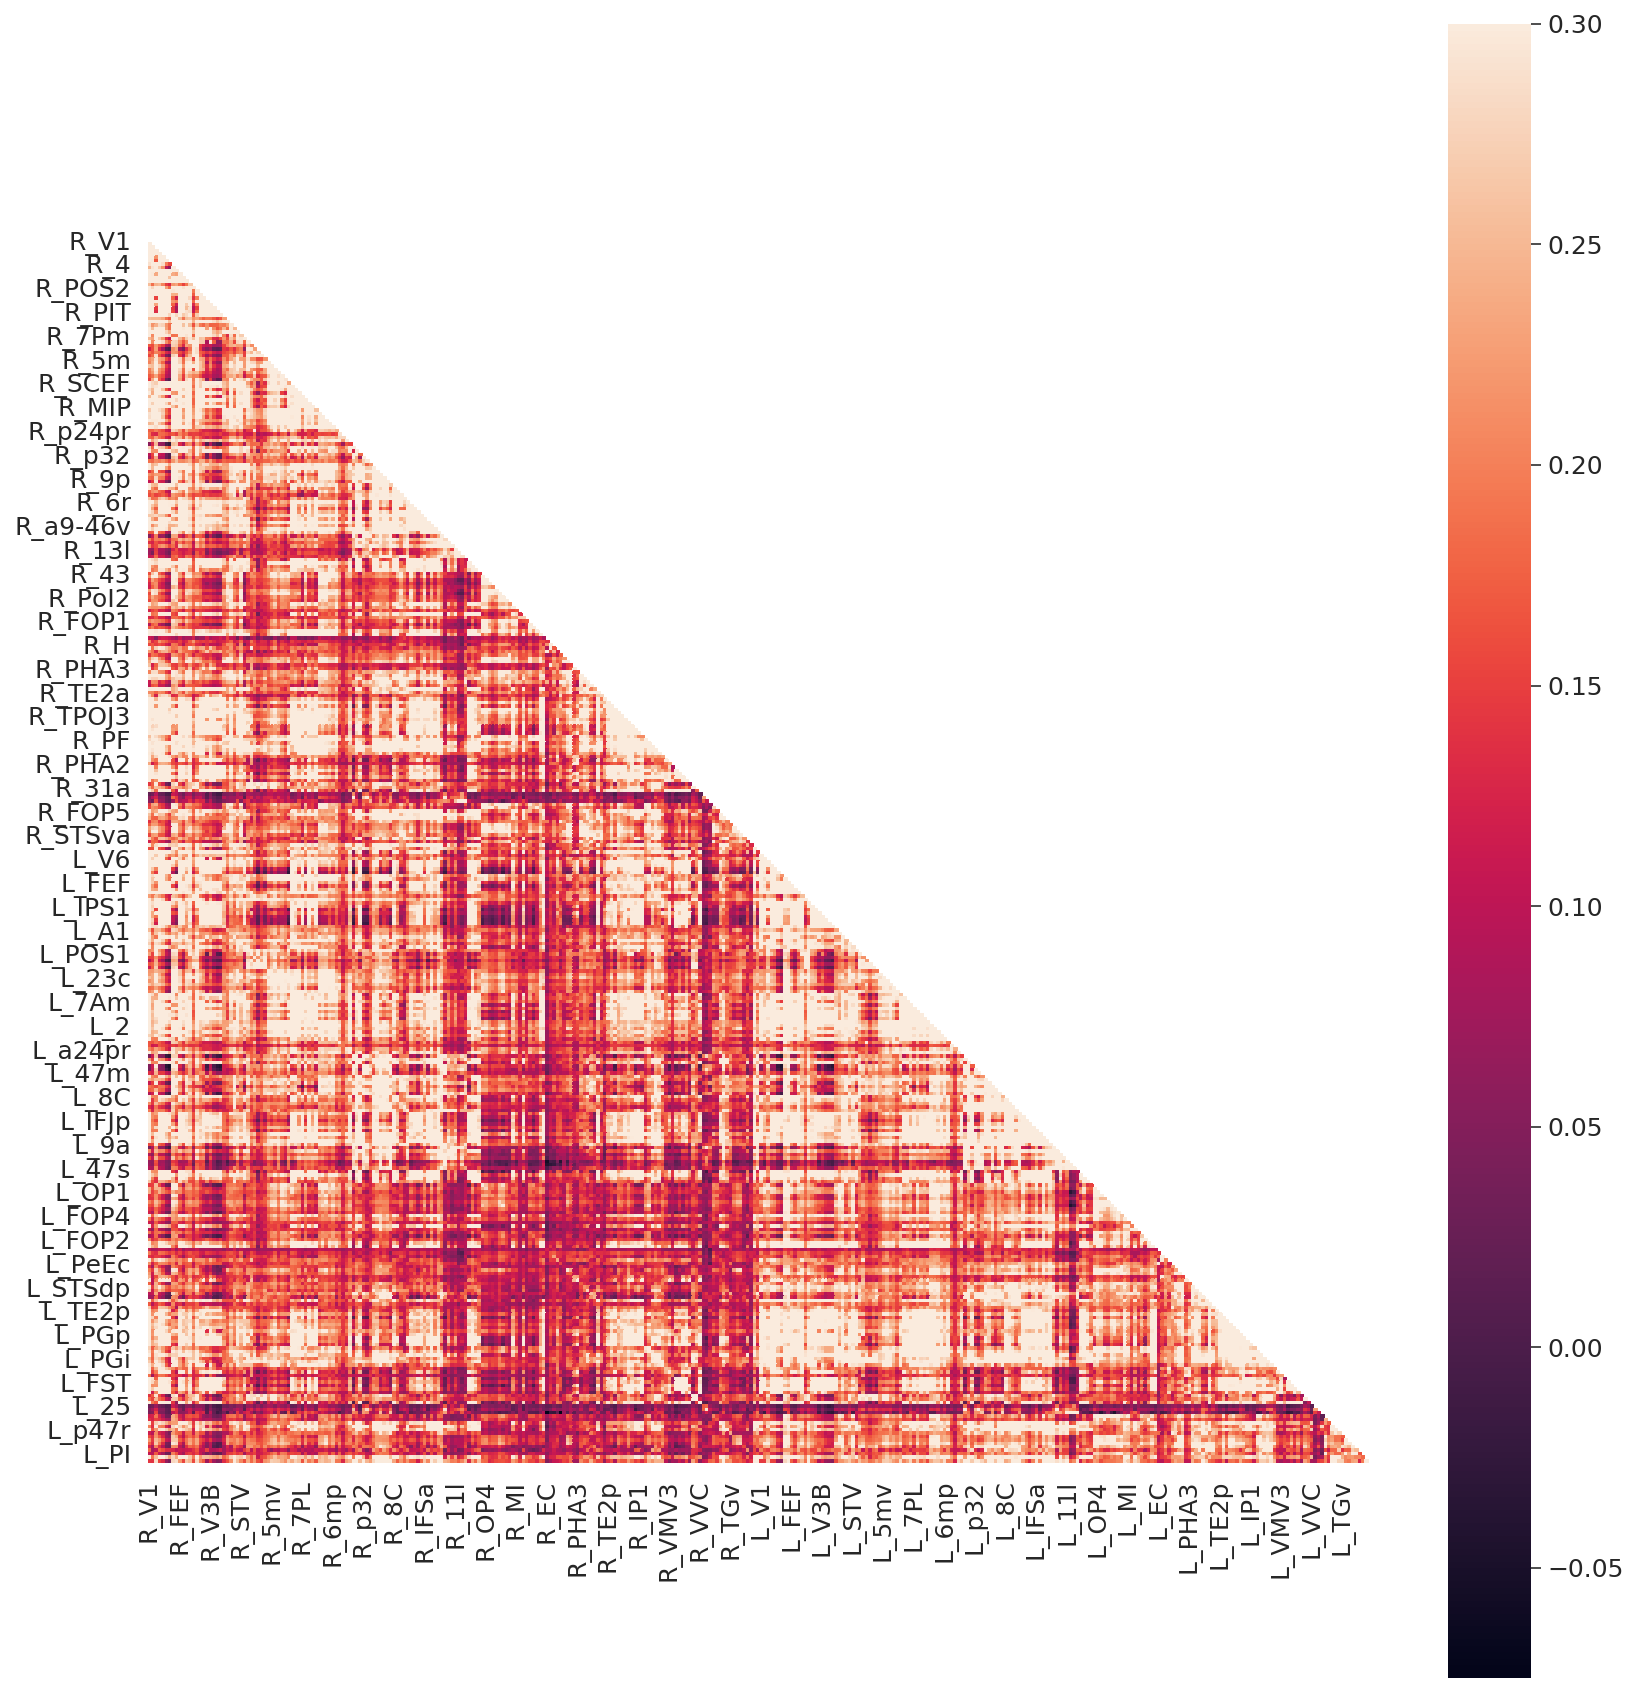

In [205]:
wm = load_one('wm/corrs')

draw_half_heatmap(wm, (12,12))
# wm = wm > 0.08
# gr = 
# plt.plot(nx.degree_histogram(gr))

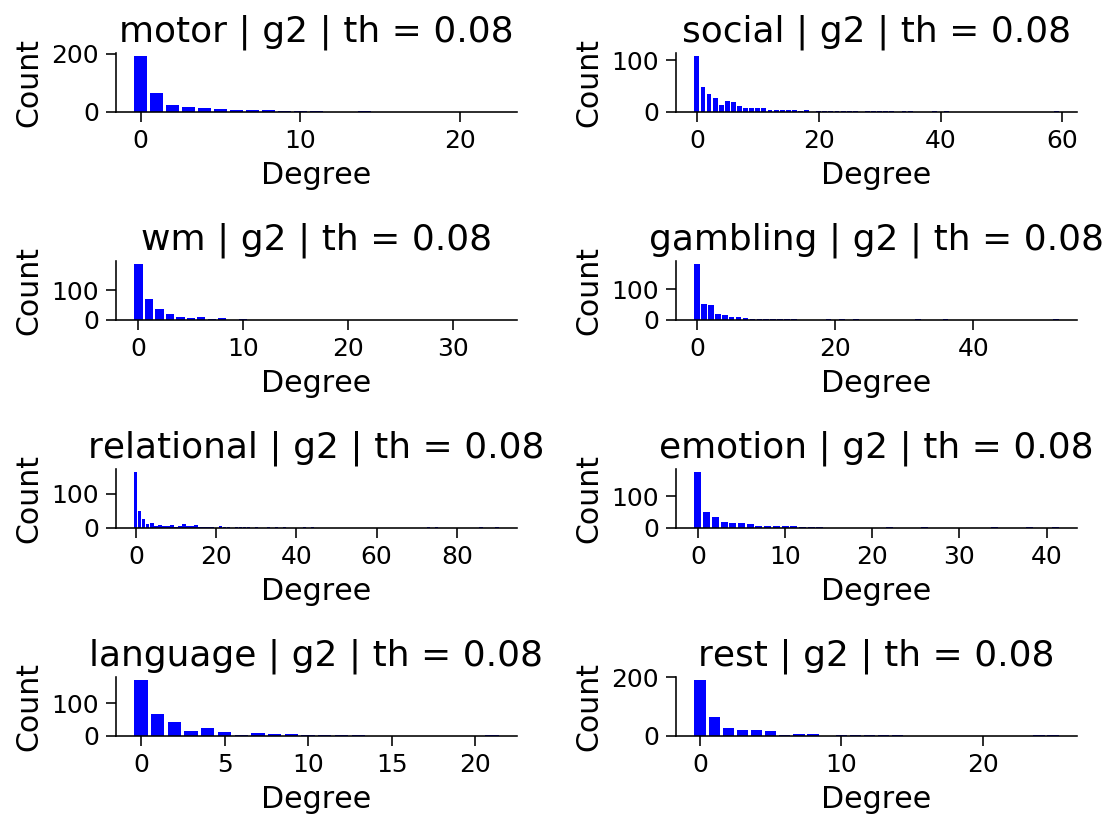

In [175]:
for idx, val in enumerate(tasks):
    task = load_one(f'{val}/g2_av')
    task = task > 0.08
    G = nx.from_numpy_matrix(task)

    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    # fig, ax = plt.subplots()

    plt.subplot(4,2,idx+1)
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title(f"{val} | g2 | th = 0.08")
    plt.ylabel("Count")
    plt.xlabel("Degree")
# ax.set_xticks([d + 0.4 for d in deg])
# ax.set_xticklabels(deg)

In [108]:
thresh = np.arange(0.06,0.2,0.02)
sizes = np.zeros((len(thresh),1))

for idx, val in enumerate(thresh):
    copymat=np.zeros_like(wm)
    copymat = wm>=val
#     copymat= copymat>=val
#     copymat[copymat<val] = 0
    sizes[idx] = np.sum(copymat)
    print(val, sizes[idx])
np.sum(wm)
np.histogram(copymat)
np.histogram(wm)

0.06 [5873.]
0.08 [2076.]
0.1 [748.]
0.12000000000000001 [277.]
0.14 [101.]
0.16000000000000003 [41.]
0.18000000000000002 [19.]
0.2 [11.]


(array([92162, 29423,  6068,  1455,   367,    88,    24,     4,     4,
            5], dtype=int64),
 array([0.        , 0.0271545 , 0.054309  , 0.08146351, 0.10861801,
        0.13577251, 0.16292701, 0.19008152, 0.21723602, 0.24439052,
        0.27154502]))

In [184]:
def decide_threshold(mat, k):
  thresh = np.arange(0.08,0.1,0.02)
  sizes = np.zeros((len(thresh),1))
  for idx, val in enumerate(thresh):
    copymat=np.zeros_like(mat)
    copymat = mat >= val # adjacency matrix using thresholding
    sizes[idx] = np.sum(copymat)
    print(val, sizes[idx])
#   plt.figure(k)  
#   plt.plot(thresh, sizes)


In [73]:
tasks[0]

'motor'

In [185]:
for idx, task in enumerate(tasks):
    dataset = load_one(f'{task}/g1_av')
    k=1
    plt.figure(k)
#     plt.subplot(2,4,idx+1)
    decide_threshold(dataset,k)
#     plt.title(f'{task}')
#     plt.legend(tasks)
# plt.figure(k)
# plt.title("no. of edges")    


0.08 [1554.]
0.1 [499.]
0.08 [4516.]
0.1 [2490.]
0.08 [2076.]
0.1 [748.]
0.08 [2675.]
0.1 [1144.]
0.08 [3954.]
0.1 [2173.]
0.08 [2605.]
0.1 [1173.]
0.08 [1928.]
0.1 [745.]
0.08 [1333.]
0.1 [461.]


<Figure size 576x432 with 0 Axes>

In [59]:
def pathlength_threshold(mat, k):
  thresh = np.arange(0.06,0.2,0.02)
  pathlength = np.zeros((len(thresh),1))
  for idx, val in enumerate(thresh):
    
    copymat = mat[mat>=val]
    pathlength[idx] = np.sum(copymat)
#     print(val, sizes[idx])
  plt.figure(k)  
  plt.plot(thresh, pathlength)

Text(0.5, 1.0, 'total path length')

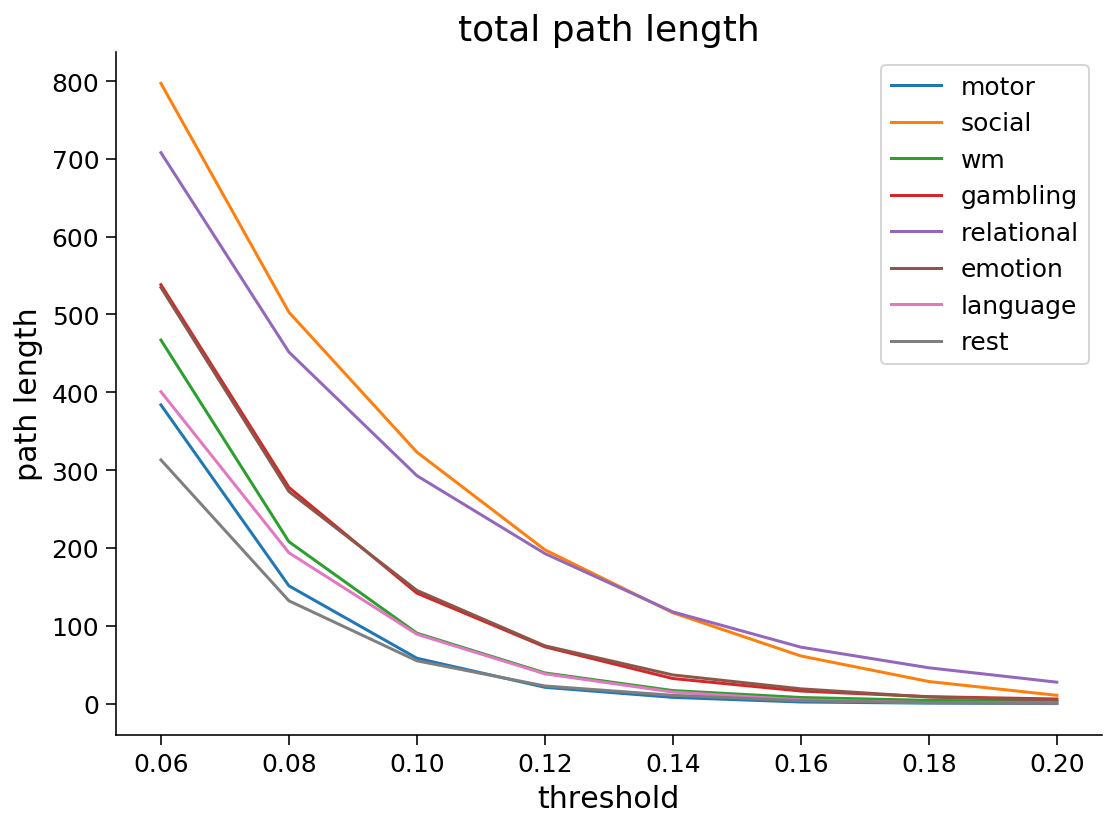

In [62]:

# get plot for total path length (by summing over edge-weights -- the thing's not right)
for idx, task in enumerate(tasks):
    dataset = load_one(f'{task}/g1_av')
    k=1
    plt.figure(k)
#     plt.subplot(2,4,idx+1)
    pathlength_threshold(dataset,k)
#     plt.title(f'{task}')
    plt.legend(tasks)
    plt.xlabel("threshold")
    plt.ylabel("path length")
plt.figure(k)
plt.title("total path length")

In [138]:
# get average path length for the gc/correlation matrix passed, as a function of different thresholds
# used to make an adjacency matrix from the input

def get_avg_path_length(mat, k):
  thresh = np.arange(0.06,0.2,0.02)
  paths = np.zeros((len(thresh),1))
  for idx, val in enumerate(thresh[0:4]):
    copymat=np.zeros_like(mat)
    copymat = mat >= val # adjacency matrix using thresholding
    Gtask = nx.from_numpy_matrix(copymat)
    ctr = 0
    starttime = time.time()
    for C in (Gtask.subgraph(c).copy() for c in nx.connected_components(Gtask)):
        paths[idx] += nx.average_shortest_path_length(C)
        endtime = time.time()
#         print(val, paths[idx], endtime - starttime)
        ctr += 1
#     paths[idx] /= ctr
    endtime = time.time()
#     print("->", val, ctr, paths[idx], endtime - starttime)
    
    
    
    
    
  plt.figure(k)  
  plt.plot(thresh, paths)


Text(0.5, 1.0, 'avg shortest path length | gc1')

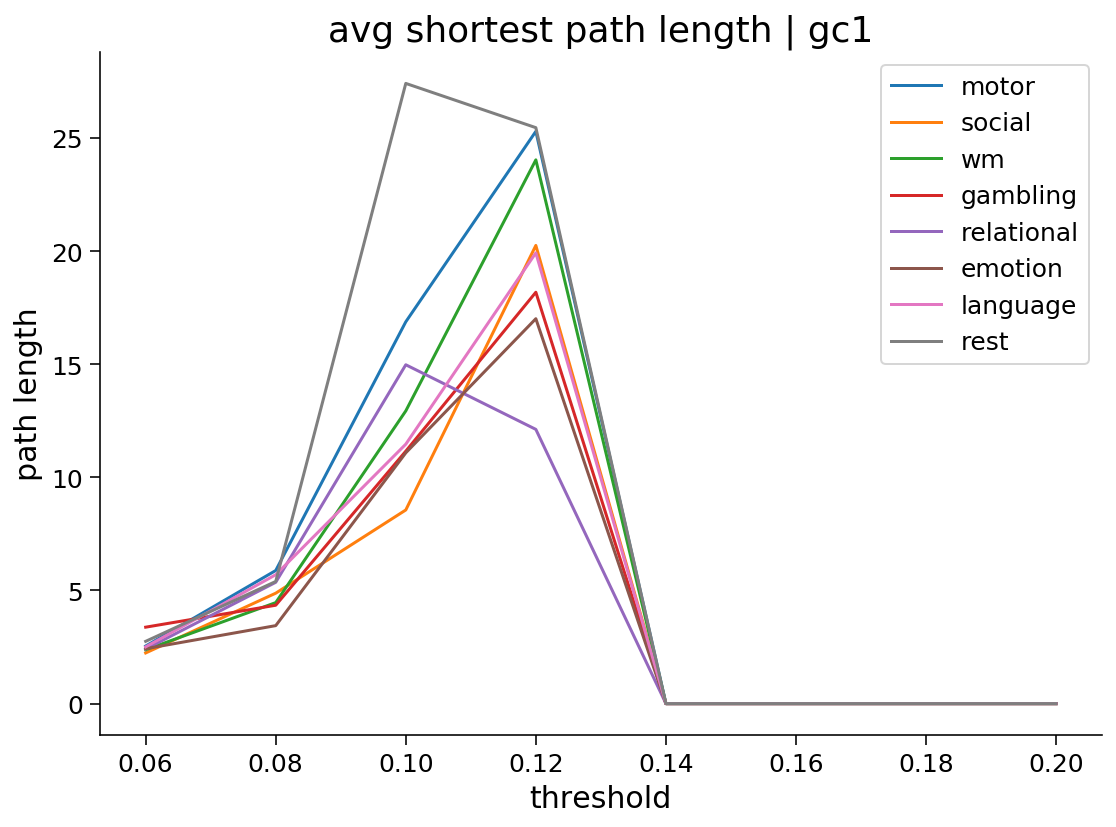

In [142]:
# get plot for avg shortest path length
# gc1
for idx, task in enumerate(tasks):
    dataset = load_one(f'{task}/g1_av')
    k=1
    plt.figure(k)
#     plt.subplot(2,4,idx+1)
    get_avg_path_length(dataset,k)
#     plt.title(f'{task}')
    plt.legend(tasks)
    plt.xlabel("threshold")
    plt.ylabel("path length")
plt.figure(k)
plt.title("avg shortest path length | gc1")

Text(0.5, 1.0, 'avg shortest path length | gc2')

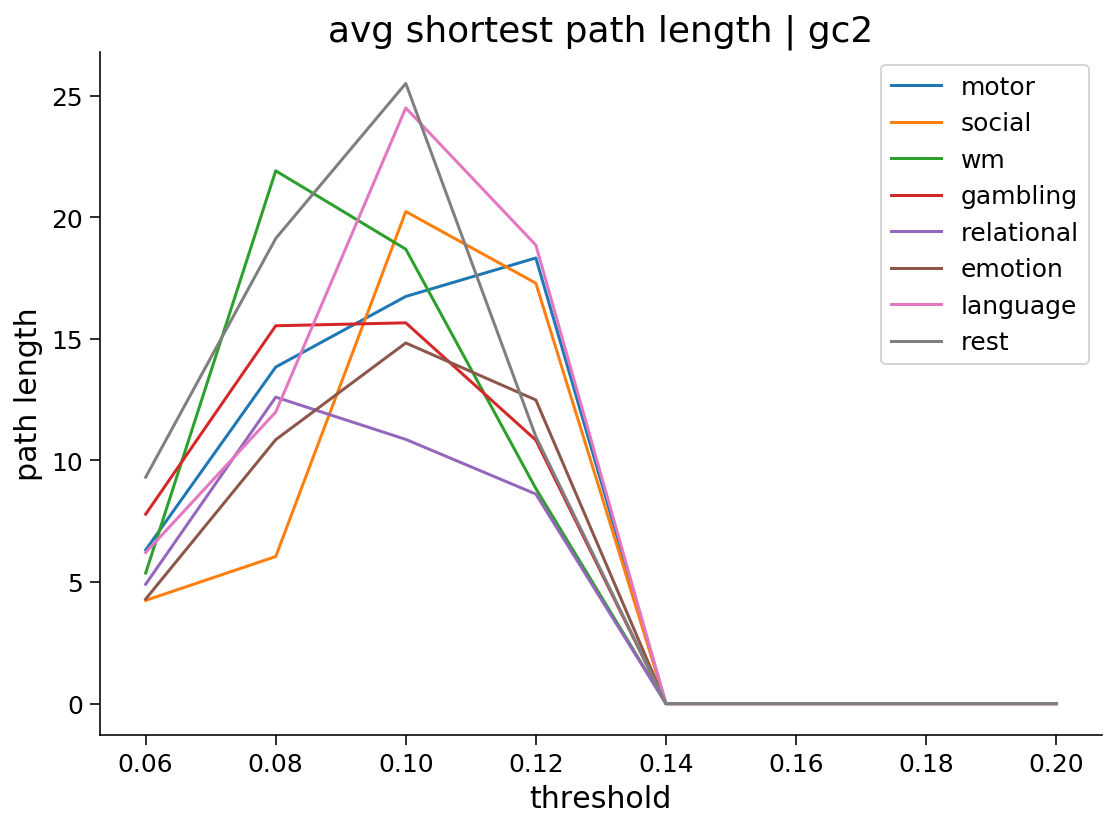

In [143]:
# get plot for avg shortest path length
# gc2
for idx, task in enumerate(tasks):
    dataset = load_one(f'{task}/g2_av')
    k=1
    plt.figure(k)
#     plt.subplot(2,4,idx+1)
    get_avg_path_length(dataset,k)
#     plt.title(f'{task}')
    plt.legend(tasks)
    plt.xlabel("threshold")
    plt.ylabel("path length")
plt.figure(k)
plt.title("avg shortest path length | gc2")

Text(0.5, 1.0, 'avg shortest path length | pearson corr')

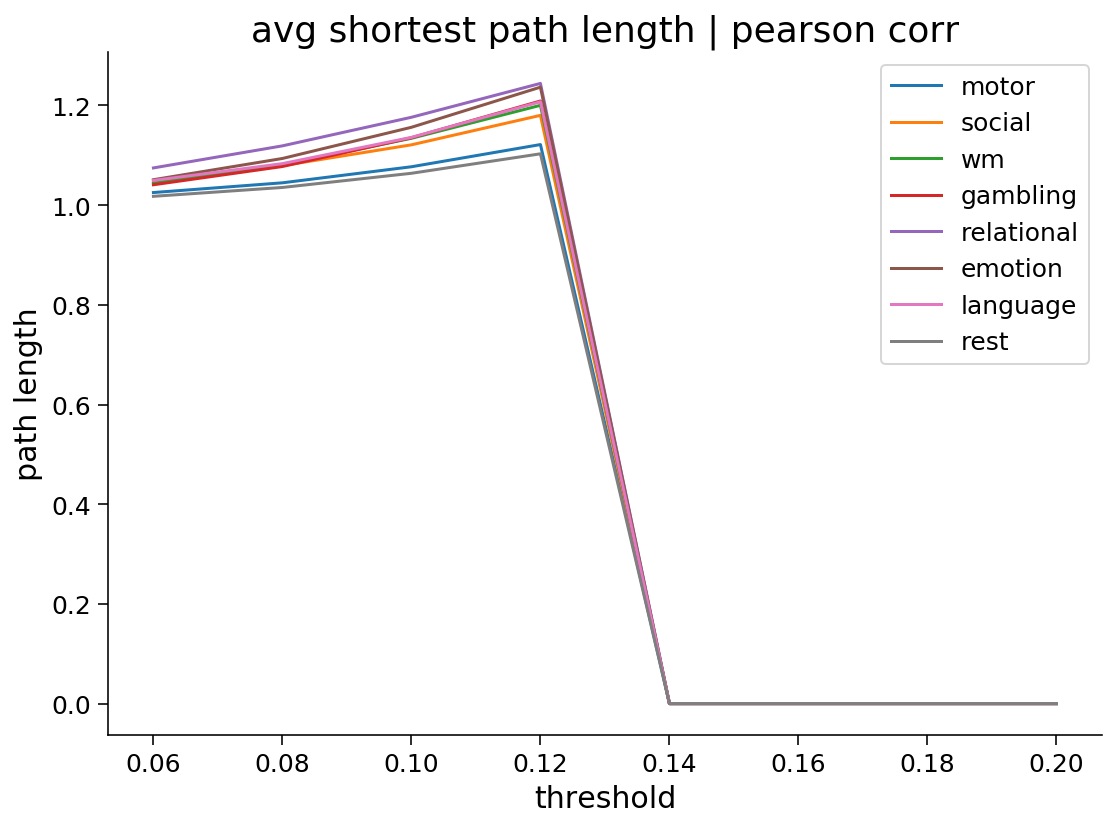

In [145]:
# get plot for avg shortest path length
# corrs
for idx, task in enumerate(tasks):
    dataset = load_one(f'{task}/corrs')
    k=1
    plt.figure(k)
#     plt.subplot(2,4,idx+1)
    get_avg_path_length(dataset,k)
#     plt.title(f'{task}')
    plt.legend(tasks)
    plt.xlabel("threshold")
    plt.ylabel("path length")
plt.figure(k)
plt.title("avg shortest path length | pearson corr")

In [179]:
def get_avg_cluster_coef(mat, k):
  thresh = np.arange(0.06,0.2,0.02)
  clust = np.zeros((len(thresh),1))
  for idx, val in enumerate(thresh):
    
    copymat = mat >= val # adjacency matrix using thresholding
    G = nx.from_numpy_matrix(copymat)
    clust[idx] = nx.average_clustering(G)
#     print(val, clust[idx])
  plt.figure(k)  
  plt.plot(thresh, clust)


Text(0.5, 1.0, 'avg clustering coeff | g2')

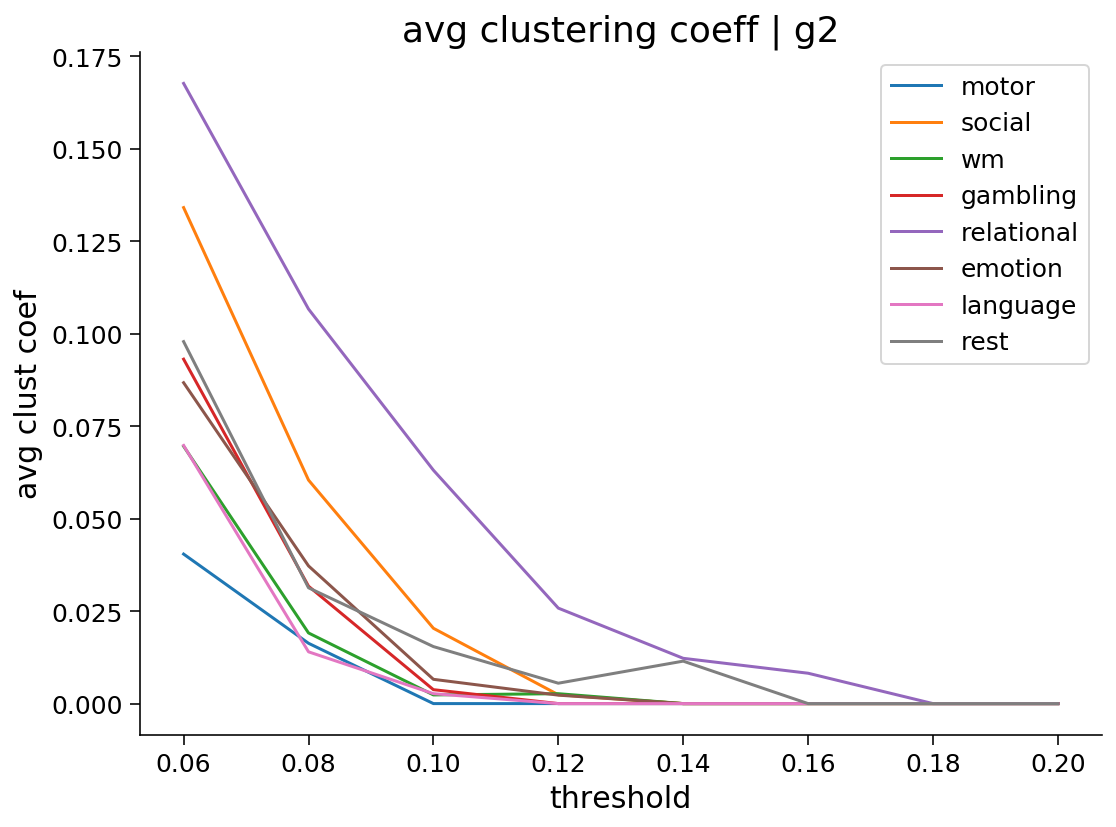

In [182]:
# get plot for avg shortest path length
# corrs
for idx, task in enumerate(tasks):
    dataset = load_one(f'{task}/g2_av')
    k=1
    plt.figure(k)
#     plt.subplot(2,4,idx+1)
    get_avg_cluster_coef(dataset,k)
#     plt.title(f'{task}')
    plt.legend(tasks)
    plt.xlabel("threshold")
    plt.ylabel("avg clust coef")
plt.figure(k)
plt.title("avg clustering coeff | g2")